# K Means Clustering Algorithm Implementation

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [5]:
X.shape

(1000, 2)

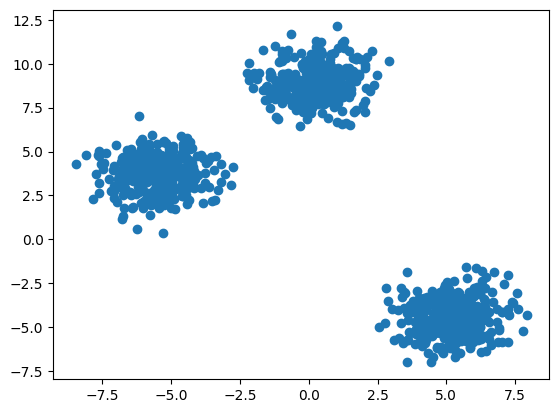

In [10]:
plt.scatter(X[:,0], X[:,1])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.cluster import KMeans



# Selecting the value of K

# 1. Manual Process - Elbow Method

In [17]:
# Elbow Method to select the k value

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1196.3716106351585,
 1045.2486429502933,
 856.1142746790763,
 756.7501468915968,
 670.5577803290926,
 581.606766047396,
 587.507457348645]

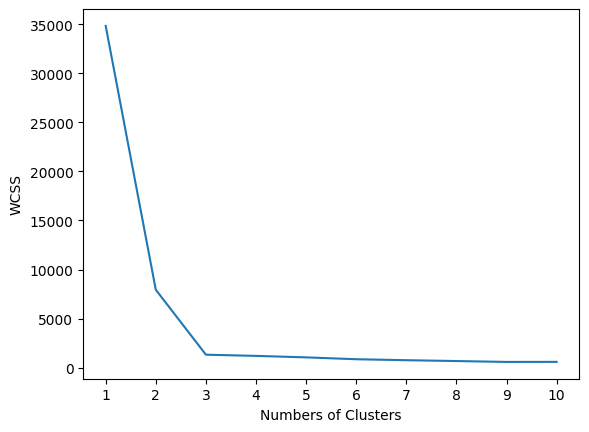

In [19]:
# plotting elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Numbers of Clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [29]:
# getting X_trian labels
y_labels = kmeans.fit_predict(X_train)

In [31]:
# getting X_test labels
y_test_labels = kmeans.predict(X_test)

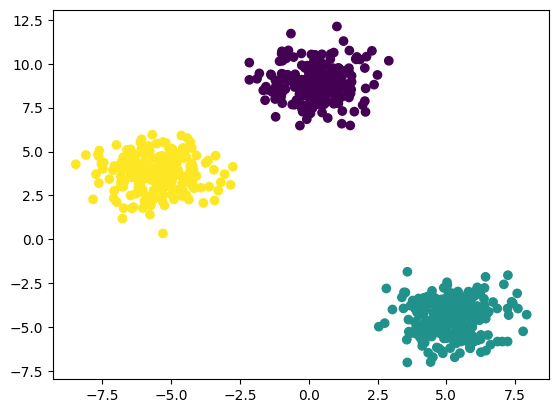

In [32]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_labels)   # c -> color

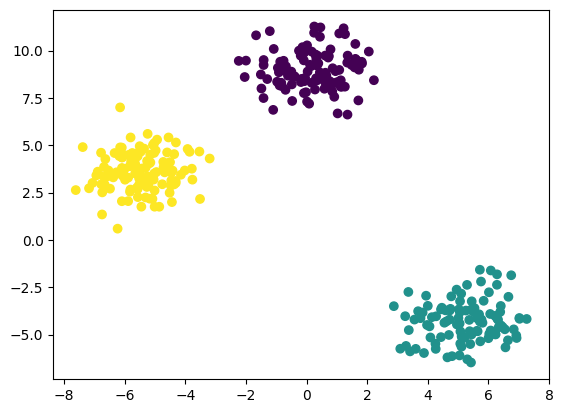

In [33]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_labels)   # c -> color

# 2. Using Library - Knee Locator

In [36]:
# installing Knee Locator
!pip install Kneed

In [38]:
from kneed import KneeLocator

In [39]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')  # we use convex because the line is decreasing, if the curve is increasing then we will use convcave

In [41]:
kl.elbow     # finding the k value

np.int64(3)

# Performance metrics
# Silhouette Score

In [44]:
from sklearn.metrics import silhouette_score

In [54]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters= k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)
    

In [55]:
silhouette_coefficients

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6357733426488265),
 np.float64(0.629564454848949),
 np.float64(0.33276226212826815),
 np.float64(0.32886500812849356),
 np.float64(0.3138484280086157),
 np.float64(0.331154492923317),
 np.float64(0.3379493268127889)]

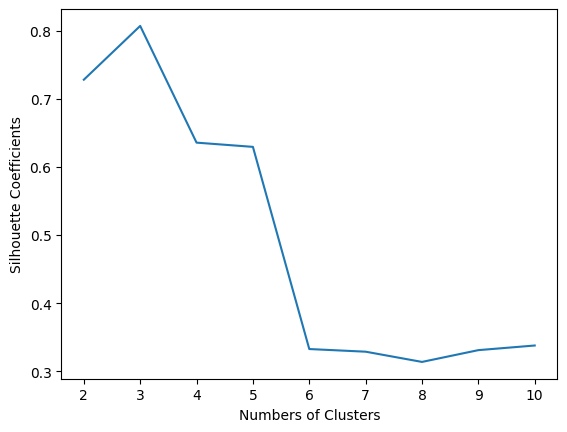

In [56]:
# plotting silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Numbers of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()

# Hierarichal Clustering Algorithm Implementation

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [87]:
# importing iris dataset
iris = datasets.load_iris()


In [64]:
iris_data = pd.DataFrame(iris.data)

In [65]:
iris_data.columns = iris.feature_names
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Standardization

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [68]:
X_scaled = scaler.fit_transform(iris_data)

In [70]:
X_scaled.shape

(150, 4)

# Apply PCA

In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA(n_components=2)

In [73]:
pca_scaled = pca.fit_transform(X_scaled)

In [74]:
pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [75]:
pca_scaled.shape

(150, 2)

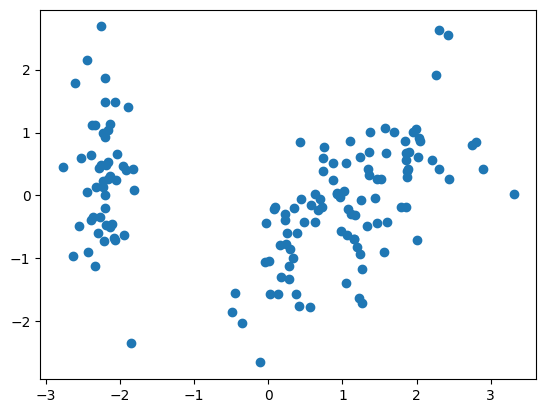

In [76]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1])

# Applying Agglomerative Clustering

Text(0, 0.5, 'Eucledian Distance')

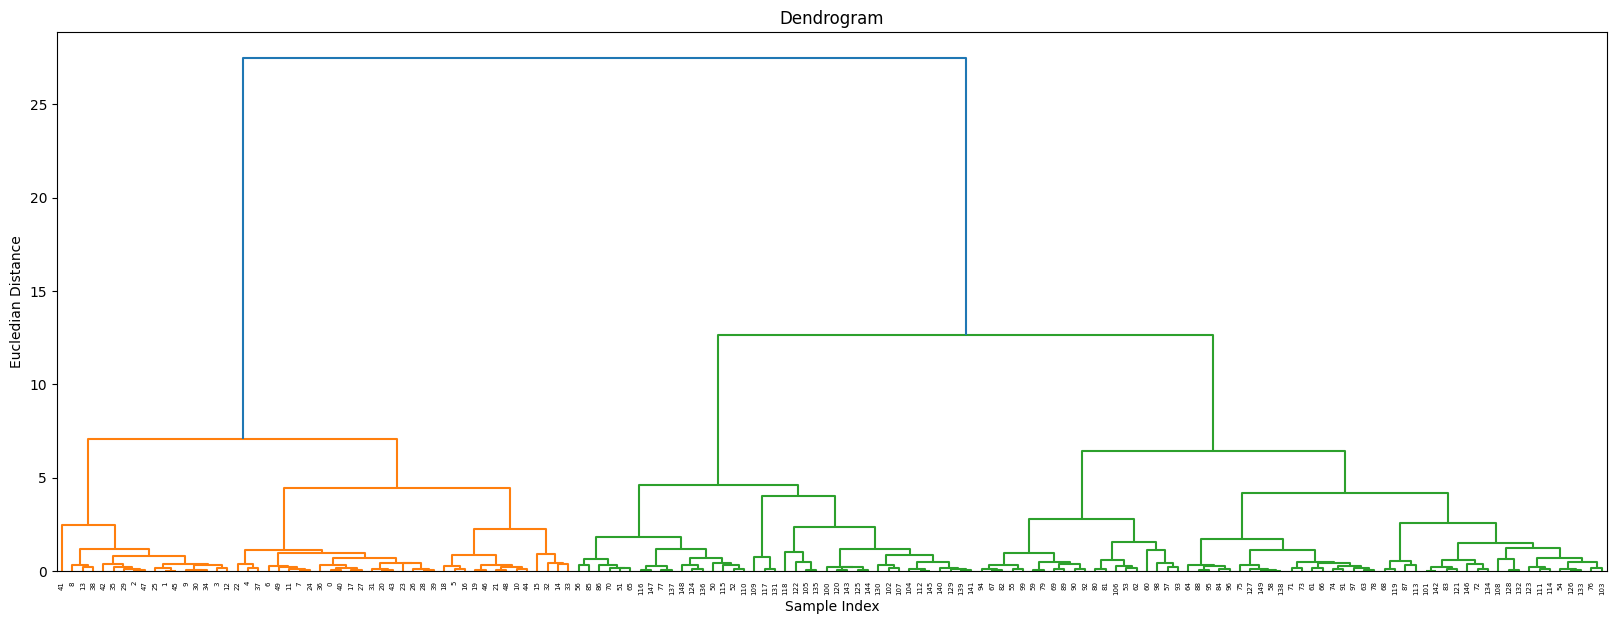

In [81]:
# constructing a dendrogram
import scipy.cluster.hierarchy as sc

# plot the dendrogram
plt.figure(figsize=(20,7))
plt.title("Dendrogram")

# create dendrogram
sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')             

In [84]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [85]:
cluster.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

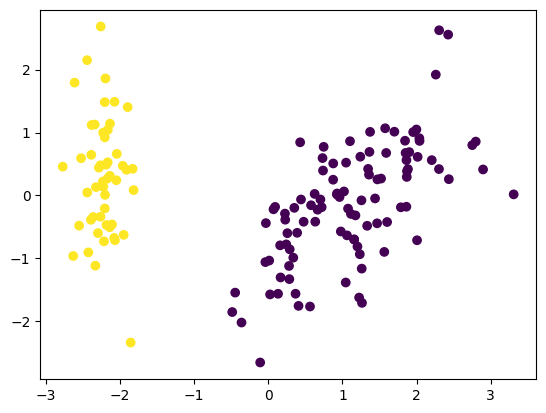

In [86]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=cluster.labels_)

# Silhouette Score

In [88]:
from sklearn.metrics import silhouette_score

In [94]:
silhouette_coefficients = []
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters= k, metric='euclidean', linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

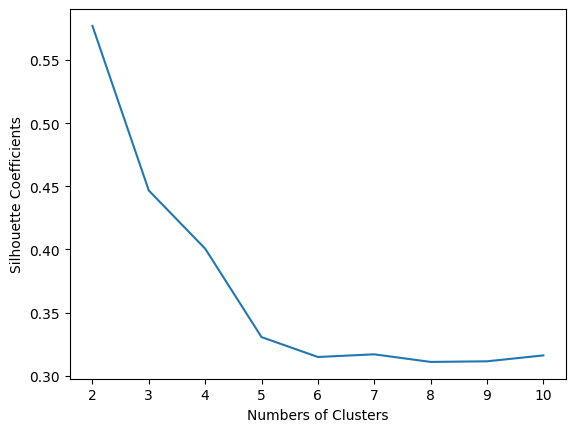

In [95]:

# plotting silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Numbers of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()   